In [19]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [20]:
def preprocess_image(image):
    image = TF.to_pil_image(image)
    image = TF.resize(image, (128, 128))
    image = TF.to_tensor(image)
    image = (image - image.min())/(image.max() - image.min())
    image = (2 * image) - 1
    image = torch.transpose(image,0,2).detach().numpy()
    return image

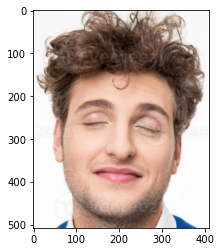

In [33]:
img = cv2.imread("demo_close.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [34]:
from tensorflow.keras.models import load_model
import torchvision.transforms.functional as TF
import torch

In [35]:
baseLine_model = load_model("open_close_baseline.h5")

In [36]:
def show_res(image):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    x = np.expand_dims(preprocess_image(gray),0)
    predicted = np.argmax(baseLine_model.predict(x))
    if predicted == 0:
        print("EYES_CLOSE")
    else:
        print("EYES_OPEN")

In [37]:
show_res(img)

EYES_CLOSE


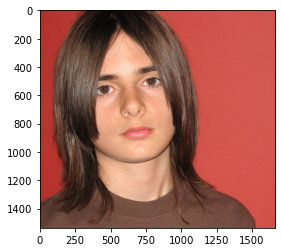

In [40]:
img = cv2.imread("231292975_1.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [41]:
show_res(img)

EYES_OPEN
